## Plot de una curva, generacon de ruido alrededor de ella y ajustar una curva sobr el ruido

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import numpy as np
from math import sin

In [2]:
def func(x, a, b, c):
    return a * np.exp(x*np.pi / 180.)

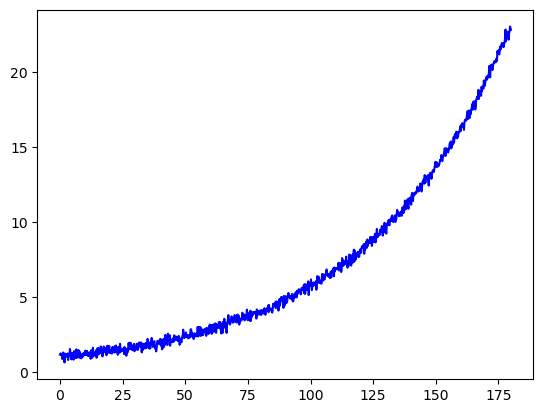

In [3]:
xdata = np.linspace(0, 180, 1000) #array de 50 datos. inicia en 0 y termina en 4, con 50 intervalos 
y = func(xdata, 1, 1.3, 56)       #Generacion de datos y= func(xdata)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size) #generacion de ruido alrededor de y
ydata = y + y_noise  #curva de y+ruido  ydata=yRuido
plt.plot(xdata, ydata, 'b-', label='data') #plot de x vs yRuido


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


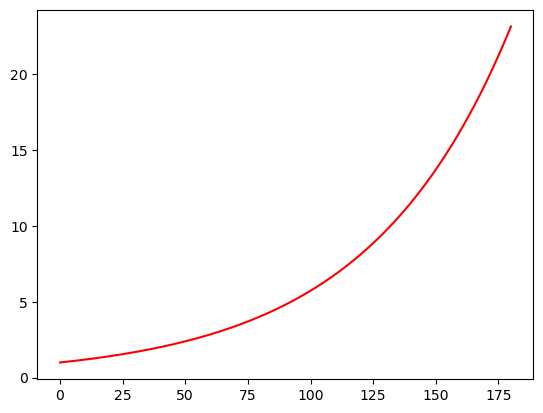

In [4]:
popt, _ = curve_fit(func, xdata, ydata) #ajustar valores de x y yRuido a la funcion "func"
#popt
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)) #plot de xdata vs f(xdata)

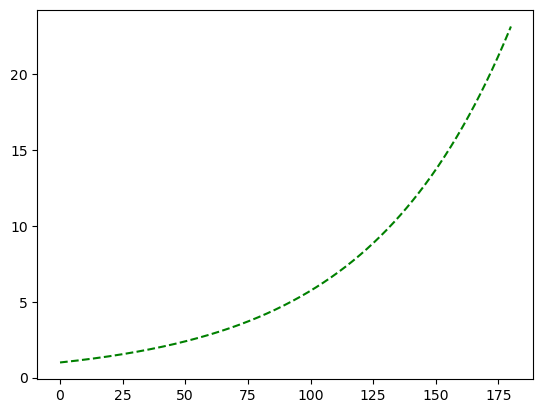

In [5]:
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [6]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

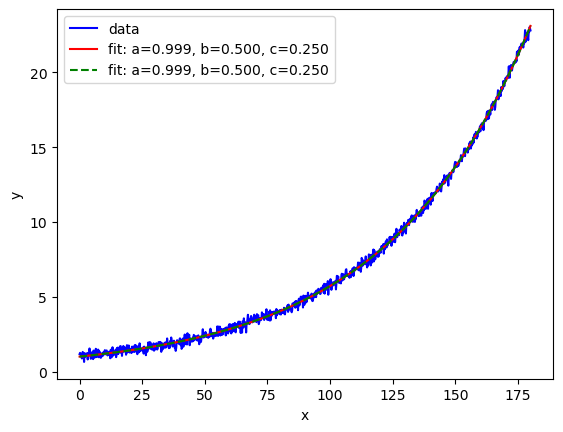

In [7]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-' ,label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()